In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Set OS Path
path = r'/Users/faridchehraz/Desktop/Python/Master - Dec2021 Instacart Basket Analysis'

In [4]:
#Import sales_cust file as DF
sales_cust = pd.read_pickle(os.path.join(path, '2. Data', 'b. Prepared Data', 'sales_cust.pkl'))

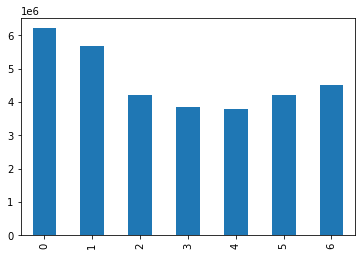

In [45]:
#Create bar graph ordered by days of the week
bar = sales_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [46]:
#Export bar graph
bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'bar_orders_dow.png'))

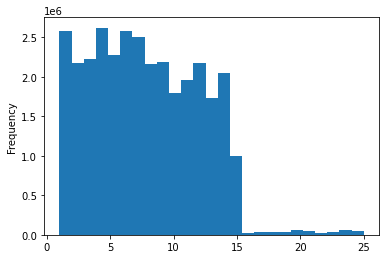

In [44]:
#Create histogram
hist = sales_cust['prices'].plot.hist(bins = 25)

In [47]:
#Export histogram
hist.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'prices.png'))

In [9]:
#Check dataframe
sales_cust['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [11]:
#Set values >100 as NaN / missing
sales_cust.loc[sales_cust['prices'] >100, 'prices'] = np.nan

In [12]:
#Check dataframe
sales_cust['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

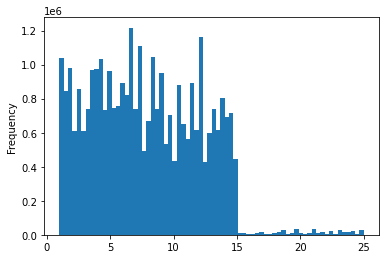

In [49]:
#Create histogram on prices with 70 bins
hist2 = sales_cust['prices'].plot.hist(bins = 70)

In [50]:
#Export histogram
hist2.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'prices2.png'))

In [14]:
#Set seed number
np.random.seed(4)

In [16]:
# Create a List holding True/False values to the test np.random.rant () <= 0.7
dev = np.random.rand (len(sales_cust)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe big
big = sales_cust[dev]

In [18]:
# Store 30% of the sample in the dataframe small
small = sales_cust[~dev]

In [19]:
#Check DF len
len(sales_cust)

32435059

In [20]:
#Check samples len
len(big) + len(small)

32435059

In [21]:
#Create DF containing necessary columns only
df_2 = small[['orders_day_of_week','prices']]

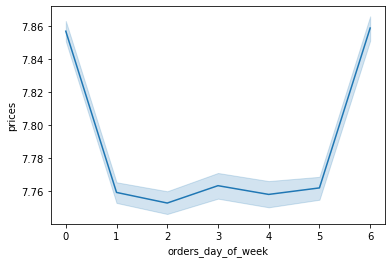

In [22]:
#Create line graph
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [51]:
#Export line graph
line.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'odotw_prices.png'))

In [27]:
pd.set_option('display.max_columns', None)
sales_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Check,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_cost_by_cust,spender_flag,cust_frequency,frequency_flag,gender,state,age,date_joined,no_dependents,fam_status,income,Check_col
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


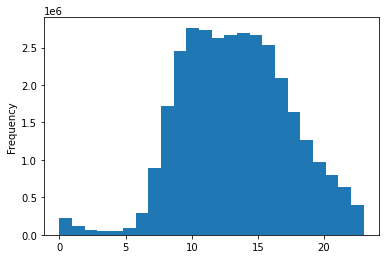

In [53]:
#Create histogram on prices with 24 bins
hist3 = sales_cust['order_hour_of_day'].plot.hist(bins = 24)

The above histogram shows most orders are made between 10am and 3pm. The busiest period is the afternoon, followed by the evening and then morning.

In [54]:
#Export histogram
hist3.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'order_hr_day.png'))

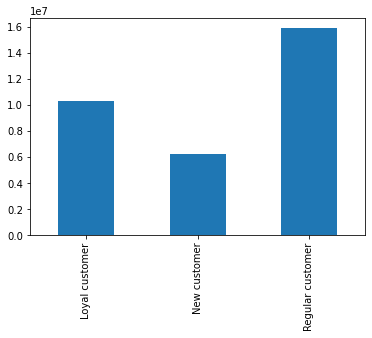

In [55]:
#Create bar graph showing customer loyalty categories
bar2 = sales_cust['loyalty_flag'].value_counts().sort_index().plot.bar()

In [56]:
#Export bar graph
bar2.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'bar_loyalty_flag.png'))

In [29]:
#Set seed number
np.random.seed(4)

In [30]:
# Create a List holding True/False values to the test np.random.rant () <= 0.7
dev = np.random.rand (len(sales_cust)) <= 0.7

In [31]:
# Store 70% of the sample in the dataframe big
big = sales_cust[dev]

In [32]:
# Store 30% of the sample in the dataframe small
small = sales_cust[~dev]

In [33]:
#Check DF len
len(sales_cust)

32435059

In [34]:
#Check samples len
len(big) + len(small)

32435059

In [35]:
#Create DF containing necessary columns only
df_3 = small[['order_hour_of_day','prices']]

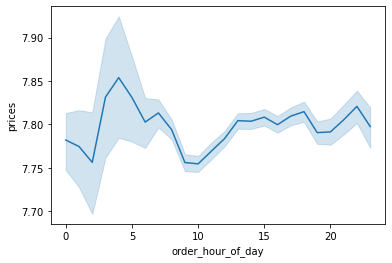

In [58]:
#Create line graph showing the order hour of the day and prices
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [59]:
#Export line graph
line2.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'order_hr_prices.png'))

In [38]:
#Create DF containing necessary columns only
df_4 = small[['age','no_dependents']]

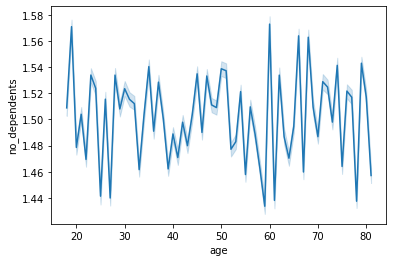

In [60]:
#Create line graph showing customer age and number of dependents
line3 = sns.lineplot(data = df_4, x = 'age',y = 'no_dependents')

In [61]:
#Export line graph
line3.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'age_dependents.png'))

The above graph shows that age is not an indicator of how many dependents a customer has

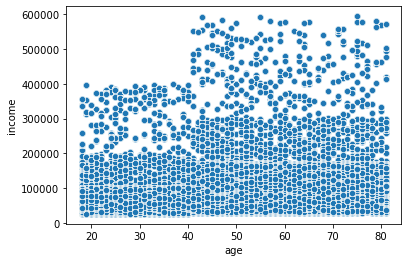

In [62]:
#Create scattergraph to show relationship between age and spending power (income)
scatter = sns.scatterplot(x = 'age', y = 'income',data = sales_cust)

In [63]:
#Export scattergraph
scatter.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'age_income.png'))

The above graph shows spending power is generally stable from the age of 20 and 40 and then increases from 40 to 80 years of age.